In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import currency.converter 
import zope as z





plt.style.use('dark_background')





In [5]:
df = pd.read_csv('/Users/sergey/ds_bootcamp/ds-phase-0/RealEstbyMW/_data.csv')
df.drop(columns=['Название ЖК','Серия дома','Тип', 'Unnamed: 0', 'Телефоны'],  inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
# Создание словаря для замены названий столбцов
column_mapping = {
    'ID  объявления': 'ID',
    'Количество комнат': 'Rooms',
    'Площадь, м2' : 'Area',
    'Метро': 'Metro',
    'Адрес': 'Address',
    'Дом': 'Building',
    'Парковка': 'Parking',
    'Цена': 'Price',
    'Описание': 'Description',
    'Ремонт': 'Renovation',
    'Площадь комнат, м2': 'Room_area',
    'Балкон': 'Balcony',
    'Окна': 'Windows',
    'Санузел': 'Bathroom',
    'Можно с детьми/животными': 'Allowed_with',
    'Дополнительно': 'Additional_features',
    'Высота потолков, м': 'Ceiling_height_m',
    'Лифт': 'Elevator',
    'Мусоропровод': 'Trash_chute',
    'Ссылка на объявление': 'Link',
    'Общая площадь': 'Total_area',
    'Цена залога': 'Rental_price',
    'Кол-во комнат ': 'Number_of_rooms'
}

# Замена названий столбцов в DataFrame
df.rename(columns=column_mapping, inplace=True)

Оставили толшько Москву так как "В качестве пилотного региона выбрана Москва"

In [8]:
# Удаляем строки из датафрейма, где столбец 'Адрес' начинается с 'Санкт-Петербург'
df.drop(df[df['Address'].str.startswith('Санкт-Петербург')].index, inplace=True)

# Удаляем строки из датафрейма, где столбец 'Адрес' начинается с 'Краснодарский край'
df.drop(df[df['Address'].str.startswith('Краснодарский край')].index, inplace=True)

df.shape

(19737, 20)

В качестве данных по площади, я решил оставить только общую площадь, так как она является максимально информативным показателем (на мой взгляд)
Так же для определения среднего показателя взята медиана, так как присутствуют выбросы(аномальные показатели).

In [9]:
# Этот код создает новый столбец 'Общая площадь' в датафрейме df
# Значения этого столбца получаются из первой части значений в столбце 'Площадь, м2',
# которые были разделены на несколько частей по символу "/" с помощью предыдущего метода split()
df['Total_area'] = df['Area'].str.split('/').str.get(0).astype(float,)
df = df.drop(['Area'], axis = 1)


# Здесь мы используем метод .agg для вычисления нескольких статистических показателей
# из столбца 'Total_area' в DataFrame df.
# Мы передаем список строковых значений ['median', 'min', 'max'] в качестве аргумента метода .agg,
# чтобы вычислить среднее значение, минимальное значение и максимальное значение этого столбца.

stats = df['Total_area'].agg(['median', 'min', 'max'])

print("Вашему вниманию представлены данные о площади сдаваемых квартр в г.Москва")
print("Средняя площадь, м2: ", stats['median'])
print("Минимальная площадь, м2: ", stats['min'])
print("Максимальная площадь, м2: ", stats['max'])






Вашему вниманию представлены данные о площади сдаваемых квартр в г.Москва
Средняя площадь, м2:  49.8
Минимальная площадь, м2:  7.0
Максимальная площадь, м2:  811.0


In [10]:
# Разделите столбец 'Цена' по слову 'Залог', возьмите первую часть и присвойте ее новому столбцу с названием 'Цена залога'
df['Rental_price'] = df['Price'].str.split('Залог').str.get(0)

# Определите функцию 'sale', которая принимает строковый аргумент 'text'
def sale(text):
    result = None  # Инициализируйте переменную 'result' значением 'None'
    parts = text.split(' ')  # Разделите входную строку по символам пробела и сохраните полученные части в списке
    value = float(parts[0])  # Извлеките числовое значение из первой части входной строки и преобразуйте его в число с плавающей точкой
    if parts[1] == 'руб./':  # Проверьте вторую часть входной строки, чтобы определить тип валюты
        result = value  # Если это рубли, установите значение 'result' равным извлеченному числовому значению
    elif parts[1] == '$/':  # Если это доллары, умножьте извлеченное числовое значение на 80 и установите 'result' равным результату
        result = value * 80
    elif parts[1] == '€/':  # Если это евро, умножьте извлеченное числовое значение на 90 и установите 'result' равным результату
        result = value * 90
    return result  # Верните окончательный результат

# Примените функцию 'sale' к столбцу 'Цена залога' и обновите его преобразованными значениями
df['Rental_price'] = df['Rental_price'].apply(sale)

# Отобразите столбец 'Цена залога'
df['Rental_price']



0        500000.0
1        500000.0
2        500000.0
3        400000.0
4        225000.0
           ...   
23363     42000.0
23364     45000.0
23365     50000.0
23366     55000.0
23367     57000.0
Name: Rental_price, Length: 19737, dtype: float64

In [11]:
# Определение функции 'sale', которая принимает строковый аргумент 'text'
def sale(text):
    result = None  # Инициализация переменной 'result' значением 'None'
    parts = text.split(' ')  # Разделение входной строки по символам пробела и сохранение полученных частей в списке 'parts'
    value = float(parts[0])  # Извлечение числового значения из первой части входной строки и преобразование его в число с плавающей точкой 'value'
    if parts[1] == 'руб./':  # Проверка второй части входной строки, чтобы определить тип валюты
        result = value  # Если это рубли, установка значения 'result' равным извлеченному числовому значению
    elif parts[1] == '$/':  # Если это доллары, умножение извлеченного числового значения на 80 и установка 'result' равным результату
        result = value * 80
    elif parts[1] == '€/':  # Если это евро, умножение извлеченного числового значения на 90 и установка 'result' равным результату
        result = value * 90
    return result  # Возврат окончательного значения 'result'

df['Price'] = df['Price'].apply(sale)  # Применение функции 'sale' к столбцу 'Цена' в объекте DataFrame 'df'

df['Price'][338]  # Вывод значения из строки с индексом 338 столбца 'Цена' в объекте DataFrame 'df'




48000.0

Здесь была оставлена только стоимость аренды жтлья без учета таких критериев как: залог, коммунальные платежи, и др.
Здесь так же для определения среднего показателя взята медиана, так как присутствуют выбросы(аномальные показатели), которые искажают данные.

In [12]:
# Этот код разбивает значения в столбце 'Price' на отдельные фрагменты по точке
# Разделитель точка передается в метод split()
# Затем метод get(0) извлекает первый фрагмент из каждого полученного значения, который содержит целую часть числа до точки
# Далее, метод astype(float) преобразует полученную строку с целой частью числа к типу float
# Результат сохраняется в новом объекте pandas Series, содержащем только целые части чисел из столбца 'Price' в формате int
# df['Цена аренды'] = df['Price'].str.split('.').str.get(0).astype(int)
df['Price']
# df['Цена залога'] = df['Цена'].str.split('Залог').str.get(0).str.split(' ').str.get(0).astype(float)
# df['Цена залога']


rent_stats = df['Price'].agg(['median', 'min', 'max'])

print("Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва")
print("Средняя цена аренды, тыс\руб: ", rent_stats['median'])
print("Минимальная цена аренды, тыс\руб: ", rent_stats['min'])
print("Максимальная цена аренды, тыс\руб: ", rent_stats['max'])




Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва
Средняя цена аренды, тыс\руб:  50000.0
Минимальная цена аренды, тыс\руб:  12000.0
Максимальная цена аренды, тыс\руб:  3000000.0


In [13]:
# Создаем новый столбец 'Number_of_rooms ' в датафрейме df
# Для каждой строки ставим значение - это первое число из строки в столбце 'Количество комнат', разделенной запятыми
# Преобразуем полученное значение в тип float и записываем его в новый столбец 'Number_of_rooms '
df['Number_of_rooms'] = df['Rooms'].str.split(',').str.get(0).astype(float)

df['Number_of_rooms'].fillna(df['Number_of_rooms'].mean(), inplace=True)

df['Number_of_rooms'].isna().sum()  # Подсчет количества пропущенных значений в столбце 'Number_of_rooms' объекта DataFrame 'df'

df['Number_of_rooms'] = round(df['Number_of_rooms'])
df.drop('Rooms', axis=1, inplace=True)
df['Number_of_rooms'].isna().sum()


0

Здесь мы убираем аномально мальенькую стоимость жилья (меньше 25_000) таких данных всего 120 строк и 
аномально большую стоимость (больше 800_000) таких данных так же около 120.
В связи с таким небольшим обьемом аномальных данных их количество не сильно повлияет но общие показатели!

In [14]:
# Этот код создает новый датафрейм, который содержит только строки из исходного датафрейма `df`,
#  где значение в столбце `'Цена аренды'` меньше `25000`. 
# - Выражение `df['Цена аренды'] < 25000` возвращает логический массив, где каждый элемент обозначает,
#  меньше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`25000`) 
# или нет.
# - Индексация квадратными скобками используется для фильтрации строк исходного датафрейма. 
# - Передача условия в квадратных скобках фильтрует строки, которые удовлетвор
# - Выражение `df['Цена аренды'] > 800_000` возвращает логический массив, где каждый элемент обозначает, 
# больше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`800_000`) 
# или нет.

df['Price'].value_counts()
# mask= (df['Цена аренды'] 

# Создаем новый датафрейм, содержащий только строки с ценой аренды меньше 25000
df[df['Price'] < 25_000] # Таких всего 120 не значительно для всего обьема данных


# Создаем новый датафрейм, содержащий только строки с ценой аренды больше 800000
df[df['Price'] > 800_000]

mask = (df['Price'] > 800_000) | (df['Price'] < 25_000)

coast = df[~mask]

df[df['Price'] < 25_000]




,ID,Metro,Address,Building,Parking,Price,Description,Renovation,Room_area,Balcony,...,Bathroom,Allowed_with,Additional_features,Ceiling_height_m,Elevator,Trash_chute,Link,Total_area,Rental_price,Number_of_rooms
270,273672956,м. Алтуфьево (15 мин на машине),"Москва, Дмитровское шоссе, 188, ш. Дмитровское...",3/3,NaN,23000.0,Сдаются апартаменты студия в частном доме для ...,Евроремонт,NaN,NaN,...,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,Нет,https://www.cian.ru/rent/flat/273672956,26.0,23000.0,2.0
839,274661422,м. Кантемировская (15 мин пешком),"Москва, улица Кошкина, 9","1/5, Кирпичный",наземная,24990.0,Сдаётся уютная однокомнатная квартира с космет...,Косметический,20,NaN,...,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,Пасс (1),NaN,https://www.cian.ru/rent/flat/274661422,36.0,24990.0,1.0
1556,274944164,м. Люблино (10 мин пешком),"Москва, Цимлянская улица, 3к3","10/15, Монолитный",NaN,22000.0,БЕЗ КОМИССИИ! ДЛЯ ОДНОГО ЧЕЛОВЕКА сдам на длит...,Евроремонт,7,NaN,...,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/274944164,10.0,22000.0,2.0
1693,273519090,м. Ховрино (20 мин на машине),"Москва, Синявинская улица, 11к3, ш. Ленинградс...","4/19, Монолитный",наземная,21500.0,Сдаётся малогабаритная студия 18кв.м. \nХороше...,Косметический,19,NaN,...,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Душевая ка...",2.78,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273519090,22.0,21500.0,2.0
1696,274926422,NaN,"Москва, Синявинская улица, 11к3, ш. Ленинградс...","2/19, Монолитный",NaN,17500.0,"Сдаётся небольшая cтудия, которая находится 20...",Косметический,NaN,NaN,...,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,Пасс (2),Да,https://www.cian.ru/rent/flat/274926422,17.0,17500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21792,274310835,м. Некрасовка (3 мин на машине),"Москва, 1-я Вольская улица, 24К1, ш. Новорязан...","14/14, Монолитный",NaN,24000.0,Квартира свободна.\n\nСдается однокомнатная кв...,Косметический,NaN,Балкон (1),...,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",3.00,Пасс (2),Да,https://www.cian.ru/rent/flat/274310835,40.0,24000.0,1.0
21885,273690648,м. Некрасовка (None мин пешком),"Москва, улица Маршала Еременко, 3к2, ш. Новоря...","10/17, Блочный",NaN,15000.0,Сдам 1 комнатную квартиру в шаговой доступност...,Без ремонта,20,Балкон (1),...,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Инт...",NaN,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273690648,40.0,15000.0,1.0
21886,274128481,м. Некрасовка (20 мин на машине),"Москва, 2-я Вольская улица, 28, ш. Новорязанск...","5/16, Панельный",наземная,22000.0,Ключи. О Т Л И Ч Н О Е - П Р Е Д Л О Ж Е Н И Е...,Косметический,21,Лоджия (1),...,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.48,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/274128481,42.0,22000.0,1.0
21887,274782344,м. Некрасовка (20 мин пешком),"Москва, улица Маршала Еременко, 5к1, ш. Новоря...","13/17, Монолитный",наземная,22000.0,"ЖК ""В НЕКРАСОВКЕ-2"" Сдается впервые ПУСТАЯ одн...",Косметический,20,Лоджия (1),...,Совмещенный (1),NaN,"Мебель на кухне, Ванна, Интернет",NaN,Пасс (2),Да,https://www.cian.ru/rent/flat/274782344,40.0,22000.0,1.0


На этом графике видно:
- самая часто встречаемая цена на рынке составляет около 35_000 рублей такая цена встречается более 4_000 раз
- основная часть квартир сдается по цене от 35_000 до 100_000 рублей
- так же видно что встречаются и более дорогие квартиры 200_000 и выше ( самая дорогая 3_000_000 рублей)
Соответственно на рынке представлен большой выбор квартир с разной ценовой политикой.


Text(0.5, 1.0, 'График колличества предложений на рынке по определенной цене')

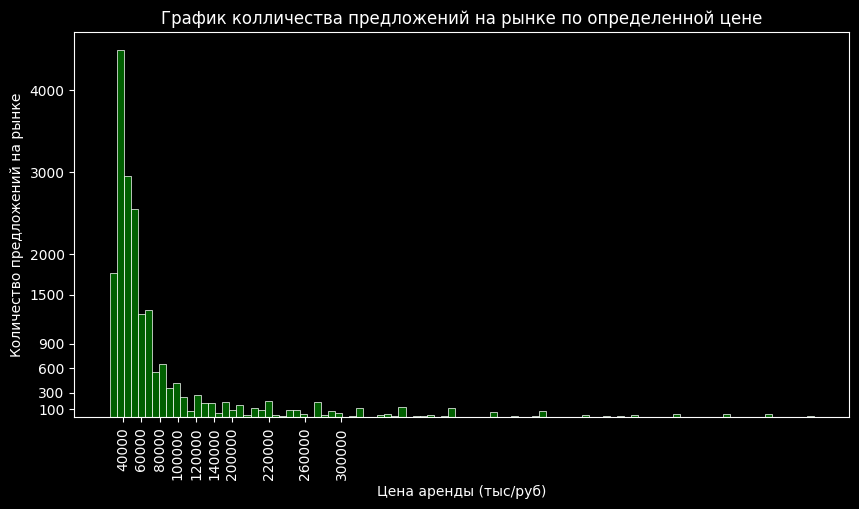

In [15]:
coast['Price']
plt.figure(figsize=(10,5))
sns.histplot(x='Price', data=coast, bins=100, color='green')
new_xticks = [40_000,60_000, 80_000, 100_000, 120_000, 140_000, 160_000, 200_000, 240_000, 280_000]
new_xticklabels = [40000, 60_000, 80_000, 100_000, 120_000, 140_000, 200_000, 220_000, 260_000, 300_000] 
plt.xticks(new_xticks, new_xticklabels)
plt.xticks(rotation=90)  
new_yticks = [100,300,600,900,1_500, 2_000, 3_000, 4_000]
plt.yticks(new_yticks)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество предложений на рынке' )
plt.title('График колличества предложений на рынке по определенной цене')

Этот график отображает взаимосвязь цены квартиры с ее площадью и количеством комнат:
- чем больше площадь тем чаще всего дороже квартира
- количество комнат так же влияет на цену квартиры 
(на графике колличество комнат отображено ввиде кружочков разного цвета и разного размера, чем больше размер тем больше комнат)
- Мы видим, что большая часть квартир площадью до 200м2

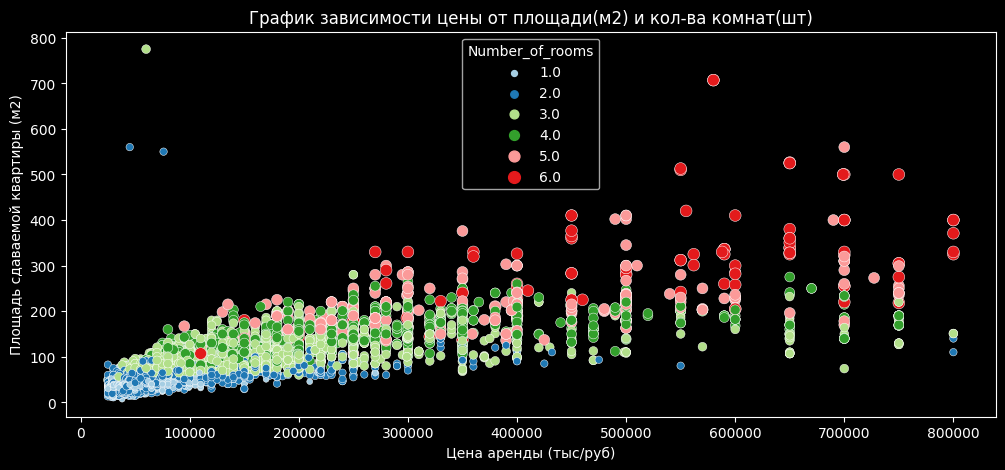

In [16]:
# Этот код группирует строки в датафрейме df по значениям столбцов 'Цена' и 'Общая площадь'
# Новый датафрейм new_df будет содержать уникальные комбинации значений этих двух столбцов
# as_index=False указывает, что новый датафрейм не должен использовать значения группировки в качестве индекса строк
# new_df = df.groupby(['Цена аренды', 'Общая площадь'], as_index=False)

new_df = coast[['Price','Total_area', 'Number_of_rooms']]
plt.figure(figsize=(12,5))
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемой квартиры (м2)' )
plt.title('График зависимости цены от площади(м2) и кол-ва комнат(шт)')
sns.scatterplot(data=coast, x='Price', y='Total_area', hue='Number_of_rooms',  palette='Paired', size='Number_of_rooms')
plt.show()



Text(0.5, 1.0, 'График взаимосвязи цены аренды и площади сдаваемого жилья ')

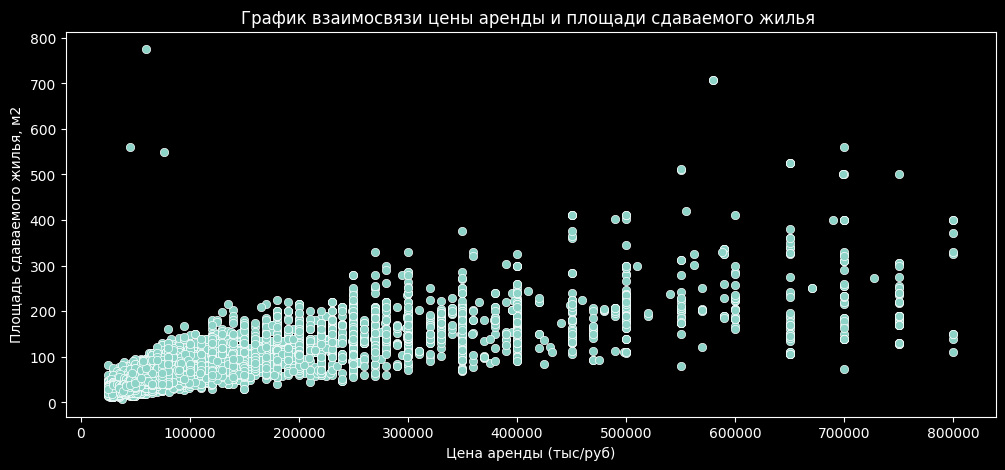

In [17]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=coast, x='Price', y='Total_area')
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемого жилья, м2' )
plt.title('График взаимосвязи цены аренды и площади сдаваемого жилья ')


Text(0.5, 1.0, 'График взаимосвязи цены аренды и количества комнат')

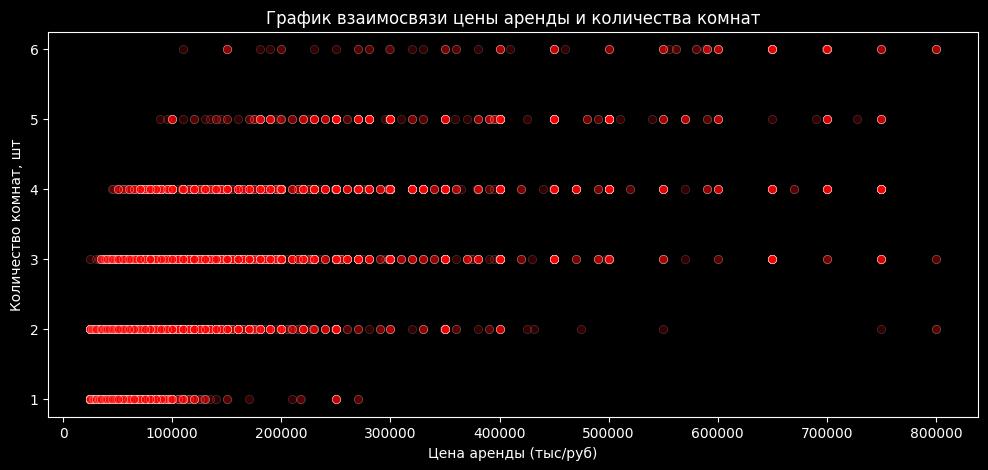

In [18]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=coast, x='Price', y='Number_of_rooms', color='red', alpha=0.2)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество комнат, шт' )
plt.title('График взаимосвязи цены аренды и количества комнат')